In [7]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os

In [83]:
parquet_directory = "data/part_10/"
files = [f for f in os.listdir(parquet_directory) if f.endswith(".parquet")]

In [84]:
new_files = []
for file in files:
    file = file.replace("least", "Least Fair")
    file = file.replace('product', 'Lottery')
    file = file.replace("weighted_scoring", "Rescore")
    file = file.replace("weightedscoring", "Rescore")
    new_files.append(file)

In [85]:
new_files

['3movie_individual_RuleCopeland_Lottery_lottery.parquet',
 '5movie_all_RuleBorda_Lottery_lottery.parquet',
 '2movie_group_RuleCopeland_weighted_Lottery_allocation.parquet',
 '2movie_group_RuleBorda_Lottery_lottery.parquet',
 '5movie_all_Rescore_Lottery_lottery.parquet',
 '3movie_individual_RuleBorda_Least Fair_fair.parquet',
 '3movie_individual_RuleCopeland_weighted_Lottery_allocation.parquet',
 '5movie_all_RuleBorda_Least Fair_fair.parquet',
 '3movie_individual_RuleCopeland_Least Fair_fair.parquet',
 '5movie_all_Rescore_weighted_Lottery_allocation.parquet',
 '5movie_all_RuleCopeland_weighted_Lottery_allocation.parquet',
 '5movie_all_Rescore_Least Fair_fair.parquet',
 '2movie_group_RuleBorda_Least Fair_fair.parquet',
 '3movie_individual_RuleBorda_Lottery_lottery.parquet',
 '2movie_group_Rescore_Least Fair_fair.parquet',
 '2movie_group_Rescore_Lottery_lottery.parquet',
 '5movie_all_RuleBorda_weighted_Lottery_allocation.parquet',
 '3movie_individual_Rescore_weighted_Lottery_allocation.p

In [86]:
ind = [f for f in files if "individual" in f]
group = [f for f in files if "group" in f]
all = [f for f in files if "_all_" in f]

In [30]:
group

['2movie_group_RuleCopeland_weighted_product_allocation.parquet',
 '2movie_group_RuleBorda_product_lottery.parquet',
 '2movie_group_RuleBorda_least_fair.parquet',
 '2movie_group_weightedscoring_least_fair.parquet',
 '2movie_group_weightedscoring_product_lottery.parquet',
 '2movie_group_RuleBorda_weighted_product_allocation.parquet',
 '2movie_group_weightedscoring_weighted_product_allocation.parquet',
 '2movie_group_RuleCopeland_least_fair.parquet',
 '2movie_group_RuleCopeland_product_lottery.parquet']

In [ ]:


fig, axes = plt.subplots(nrows=len(files), ncols=1, figsize=(10, 5 * len(files)), sharex=True)

if len(files) == 1:
    axes = [axes] 

for ax, filename in zip(axes, new_files):
    file_path = os.path.join(parquet_directory, filename)
    fileparts = filename.split("_")
    df = pd.read_parquet(file_path)
    df.columns = ['time', 'user', 'agent_item', 'id', 'score', 'rank', 'type']
    df['choice'] = fileparts[2]
    df['allocation'] = fileparts[3]
    df_al = df[df['type'] == " allocation"]

    
    for id_value, group in df_al.groupby('id'):
        ax.plot(group['time'], group['score'].cumsum(), label=f'ID {id_value}')
    
    ax.set_title(f'Allocation Over Time ({filename})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Cumulative Allocation')
    ax.legend()

plt.tight_layout()
plt.show()



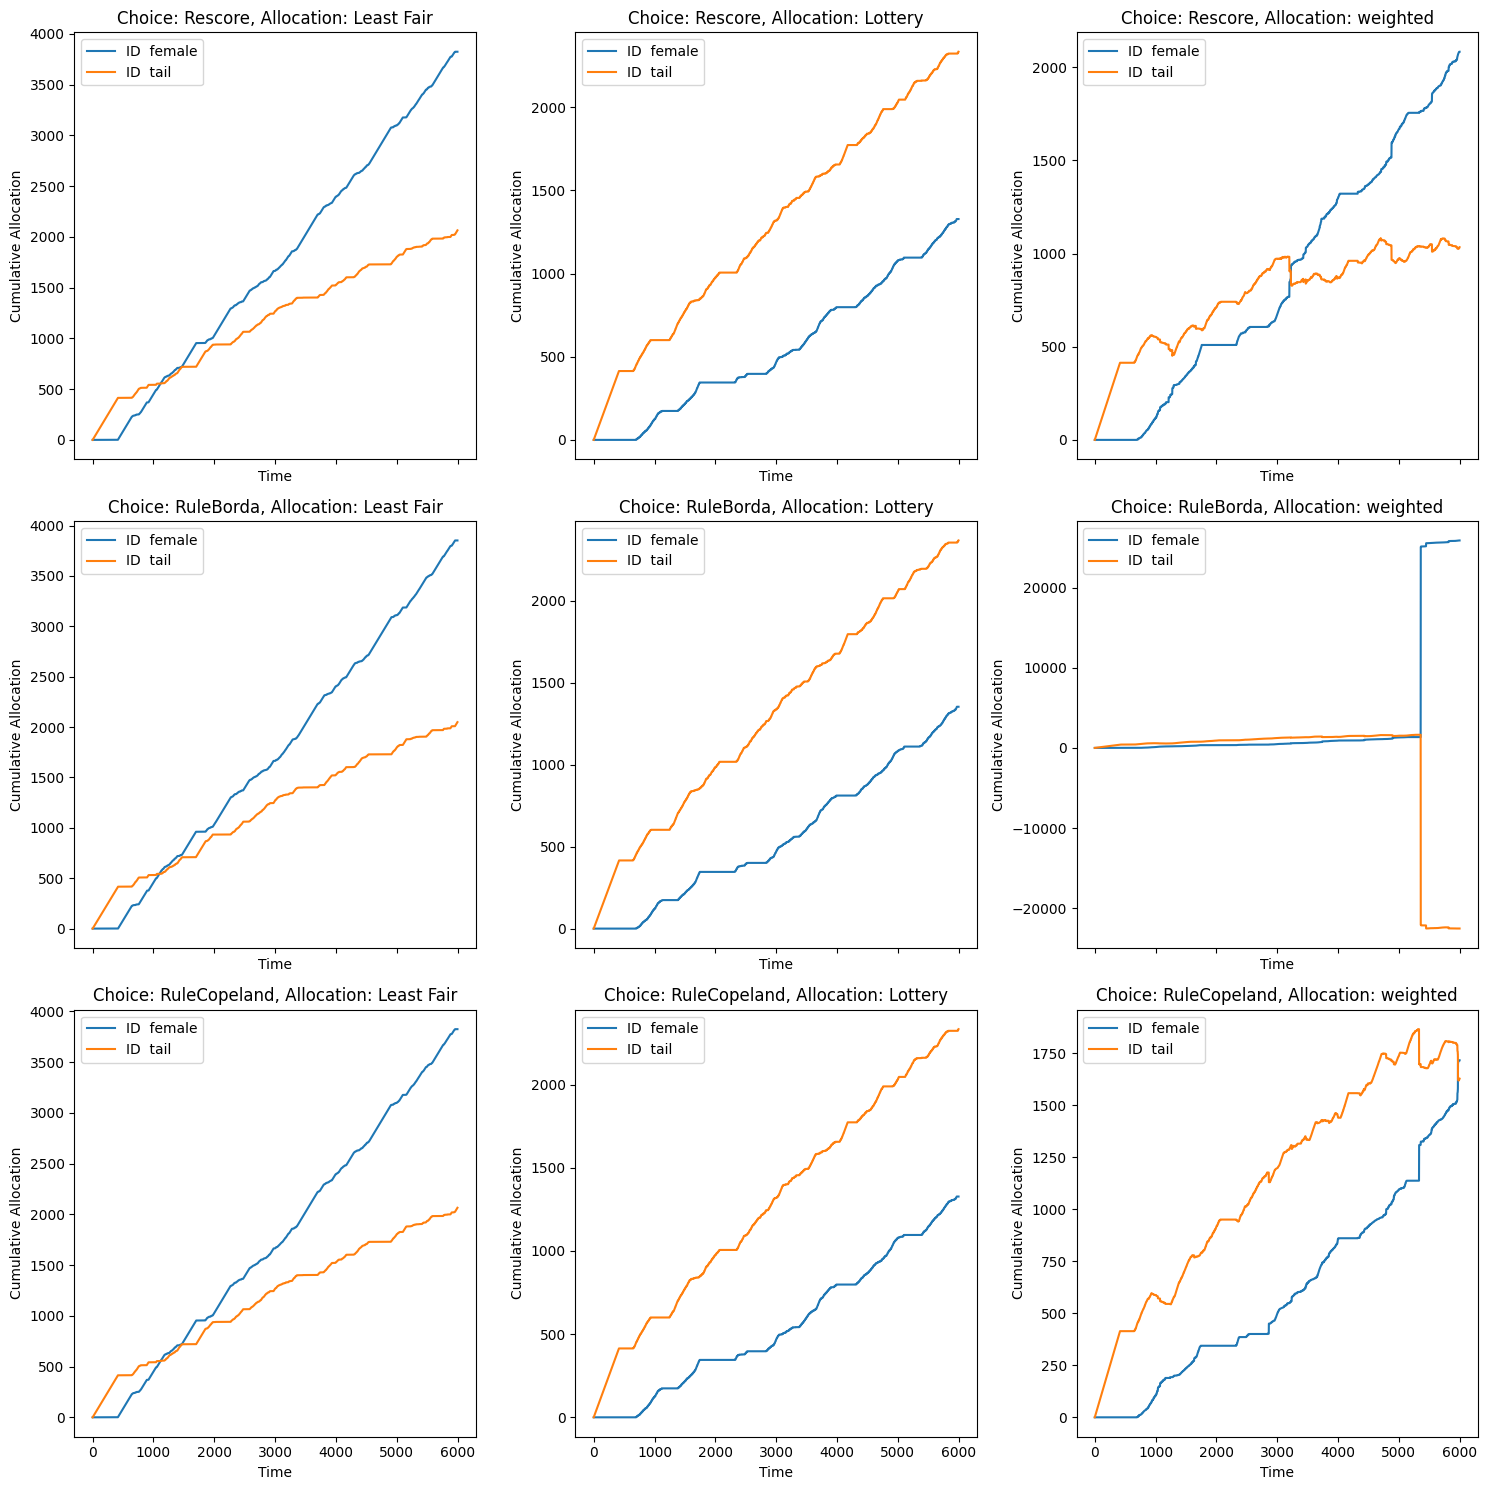

In [50]:
choices = sorted(set(f.split("_")[2] for f in new_files))
allocations = sorted(set(f.split("_")[3] for f in new_files))

nrows = len(choices)
ncols = len(allocations)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows), sharex=True)

if nrows == 1 and ncols == 1:
    axes = np.array([[axes]])
elif nrows == 1:
    axes = np.array([axes])  
elif ncols == 1:
    axes = np.array([[ax] for ax in axes])  

subplot_map = {(choice, allocation): (i, j) for i, choice in enumerate(choices) for j, allocation in enumerate(allocations)}

for filename in all:
    file_path = os.path.join(parquet_directory, filename)
    file = filename.replace("least", "Least Fair")
    file = file.replace('product', 'Lottery')
    file = file.replace("weighted_scoring", "Rescore")
    file = file.replace("weightedscoring", "Rescore")
    fileparts = file.split("_")
    choice = fileparts[2]
    allocation = fileparts[3]
    
    if (choice, allocation) in subplot_map:
        i, j = subplot_map[(choice, allocation)]
        ax = axes[i, j]
        
        df = pd.read_parquet(file_path)
        df.columns = ['time', 'user', 'agent_item', 'id', 'score', 'rank', 'type']
        df['choice'] = choice
        df['allocation'] = allocation
        df_al = df[df['type'] == " allocation"]

        for id_value, grouped in df_al.groupby('id'):
            ax.plot(grouped['time'], grouped['score'].cumsum(), label=f'ID {id_value}')
        
        ax.set_title(f'Choice: {choice}, Allocation: {allocation}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Cumulative Allocation')
        ax.legend()

plt.tight_layout()

plt.show()


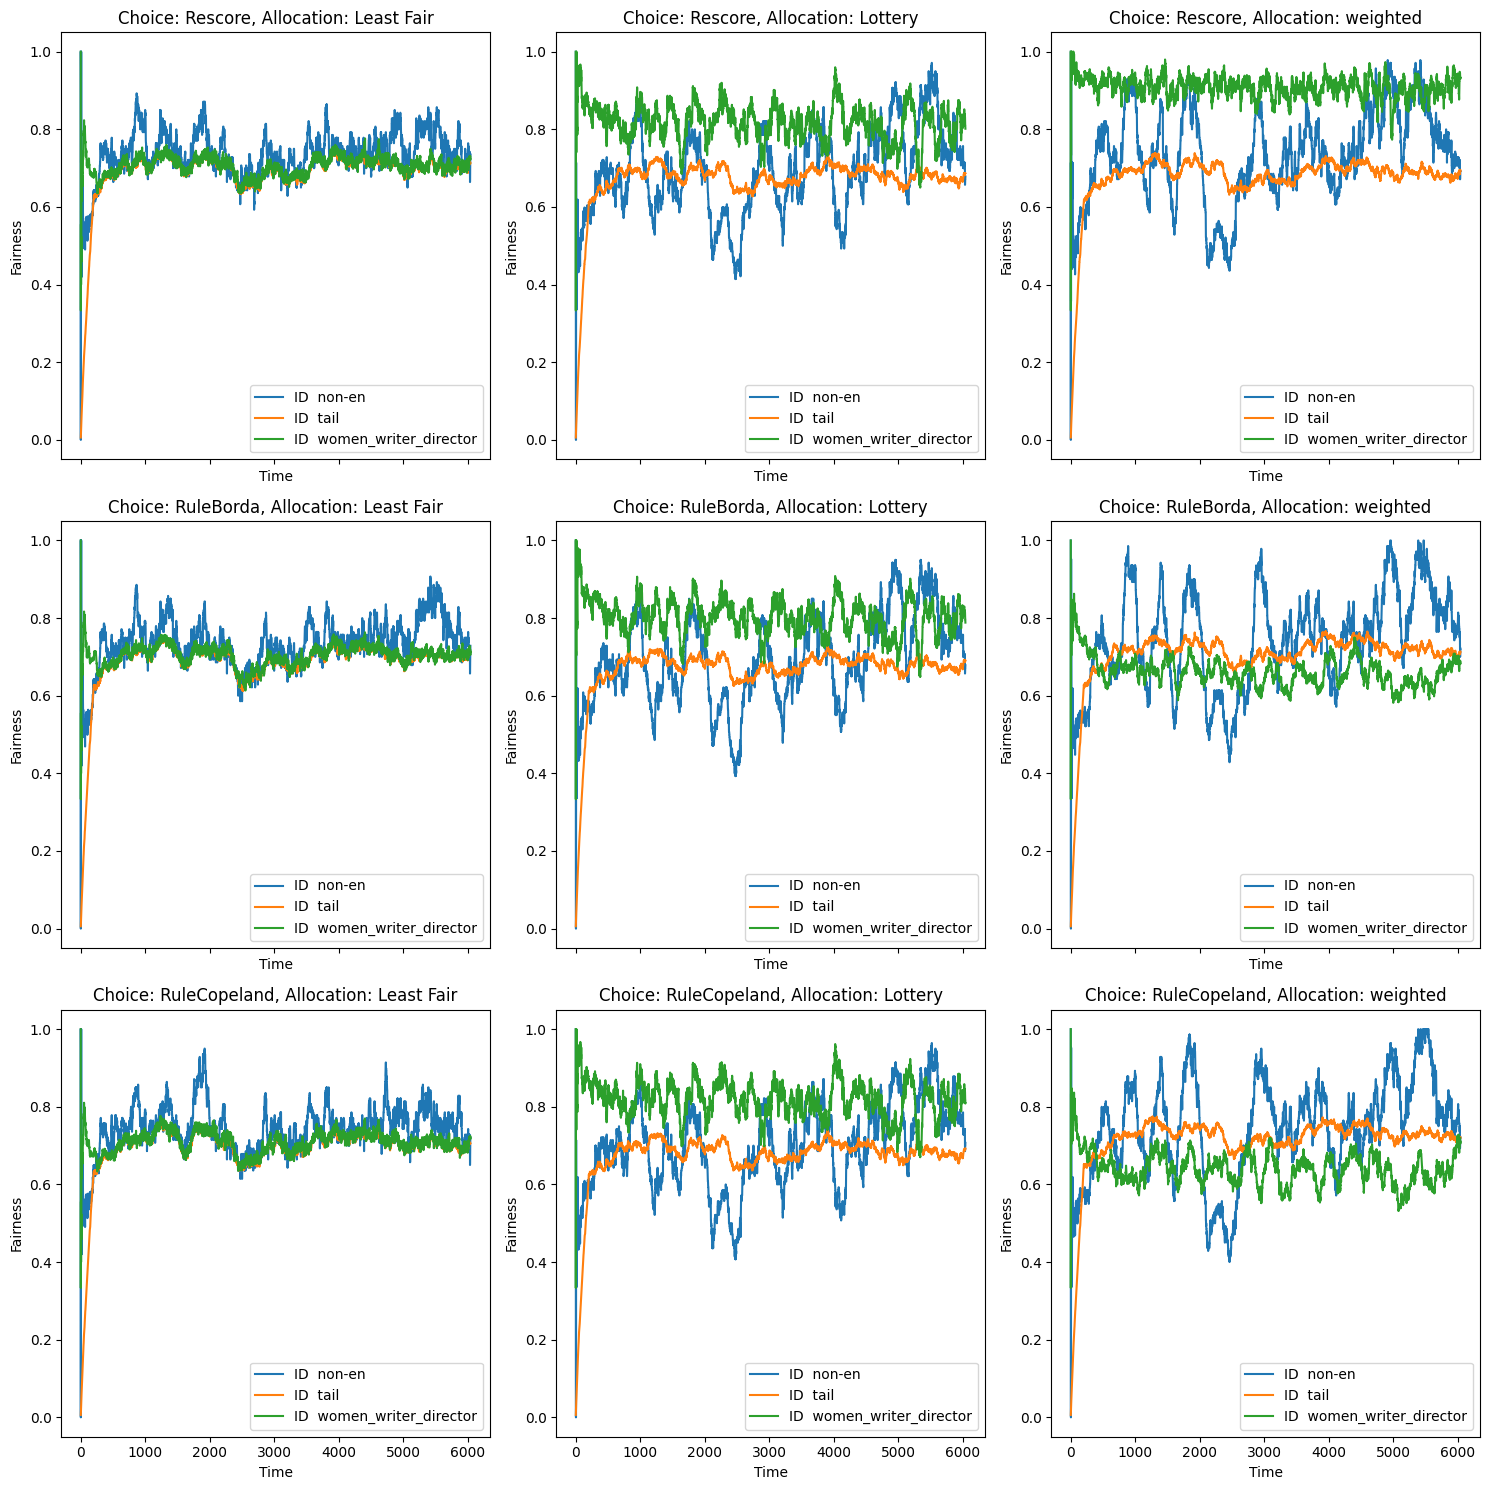

In [89]:
choices = sorted(set(f.split("_")[2] for f in new_files))
allocations = sorted(set(f.split("_")[3] for f in new_files))

nrows = len(choices)
ncols = len(allocations)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows), sharex=True)

if nrows == 1 and ncols == 1:
    axes = np.array([[axes]]) 
elif nrows == 1:
    axes = np.array([axes])  
elif ncols == 1:
    axes = np.array([[ax] for ax in axes]) 

subplot_map = {(choice, allocation): (i, j) for i, choice in enumerate(choices) for j, allocation in enumerate(allocations)}

for filename in all:
    file_path = os.path.join(parquet_directory, filename)
    file = filename.replace("least", "Least Fair")
    file = file.replace('product', 'Lottery')
    file = file.replace("weighted_scoring", "Rescore")
    file = file.replace("weightedscoring", "Rescore")
    fileparts = file.split("_")
    choice = fileparts[2]
    allocation = fileparts[3]
    
    if (choice, allocation) in subplot_map:
        i, j = subplot_map[(choice, allocation)]
        ax = axes[i, j]
        
        df = pd.read_parquet(file_path)
        df.columns = ['time', 'user', 'agent_item', 'id', 'score', 'rank', 'type']
        df['choice'] = choice
        df['allocation'] = allocation
        df_al = df[df['type'] == " fairness"]

        for id_value, grouped in df_al.groupby('id'):
            ax.plot(grouped['time'], grouped['score'], label=f'ID {id_value}')
        
        ax.set_title(f'Choice: {choice}, Allocation: {allocation}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Fairness')
        ax.legend()

plt.tight_layout()


In [51]:
all

['4ambar_all_RuleBorda_product_lottery.parquet',
 '4ambar_all_RuleCopeland_product_lottery.parquet',
 '4ambar_all_RuleBorda_weighted_product_allocation.parquet',
 '4ambar_all_weighted_scoring_product_lottery.parquet',
 '4ambar_all_RuleCopeland_least_fair.parquet',
 '4ambar_all_RuleCopeland_weighted_product_allocation.parquet',
 '4ambar_all_weighted_scoring_weighted_product_allocation.parquet',
 '4ambar_all_RuleBorda_least_fair.parquet',
 '4ambar_all_weighted_scoring_least_fair.parquet']

In [52]:
base = pd.read_parquet('data/ambar_part3/4ambar_all_RuleBorda_weighted_product_allocation.parquet')

In [76]:
base

,time,user,agent_item,id,score,rank,type
0,0,580456383,agent,tail,0.818100,NaN,compatibility
1,0,580456383,agent,tail,0.000000,NaN,allocation
2,0,580456383,agent,female,1.000000,NaN,fairness
3,0,580456383,agent,female,1.000000,NaN,compatibility
4,0,580456383,agent,female,0.000000,NaN,allocation
...,...,...,...,...,...,...,...
395862,5997,353089171,item,134584,40.818182,5.0,output
395863,5997,353089171,item,136275,40.636364,6.0,output
395864,5997,353089171,item,9999,40.000000,7.0,output
395865,5997,353089171,item,103847,39.000000,8.0,output


In [53]:
base.columns = ['time', 'user', 'agent_item', 'id', 'score', 'rank', 'type']

In [93]:
base_recs = base[(base['type'] == " allocation") | (base["type"] == " fairness")]

In [101]:
base_recs[19300:19350]

,time,user,agent_item,id,score,rank,type
318451,4825,90438964,agent,tail,-0.050354,NaN,allocation
318452,4825,90438964,agent,female,0.577600,NaN,fairness
318454,4825,90438964,agent,female,1.050354,NaN,allocation
318515,4826,600055098,agent,tail,1.019385,NaN,fairness
318517,4826,600055098,agent,tail,-0.086009,NaN,allocation
318518,4826,600055098,agent,female,0.585600,NaN,fairness
318520,4826,600055098,agent,female,1.086009,NaN,allocation
318581,4827,301743725,agent,tail,1.020308,NaN,fairness
318583,4827,301743725,agent,tail,-0.243060,NaN,allocation
318584,4827,301743725,agent,female,0.593600,NaN,fairness


In [50]:
first['id'].nunique()

663

In [3]:
min = pd.read_csv('min_history.csv')
og = pd.read_csv('history_og.csv')
smooth = pd.read_csv('history_smooth.csv')

In [7]:
female = min[(min['id'] == " female") | (min['id'] == ' tail')]

In [9]:
female = female[female['type'] ==" fairness"]
female.groupby('id').mean('score')

,Unnamed: 0,time,user,score,rank
id,,,,,
female,197903.0,2998.5,4.984077e+08,0.637856,NaN
tail,197933.0,2999.0,4.983940e+08,0.637214,NaN


In [18]:
min = min[min['id'] == " female"]
min = min[min['type'] == ' allocation']
og = og[og['id'] == " female"]
og = og[og['type'] == ' allocation']
smooth = smooth[smooth['id'] == " female"]
smooth = smooth[smooth['type'] == ' allocation']

In [22]:
smooth.score.sum()

1811.5532434669663

In [23]:
og.score.sum()

798.0

In [24]:
min.score.sum()

2519.879582295863